# Machine Learning

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
from sklearn.model_selection import train_test_split
from sklearn import svm
import time
from collections import Counter
from mnist import MNIST

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [166]:
# Reads in Data
mndata = MNIST('../data')

In [167]:
# Import 
mnist_images, mnist_labels = mndata.load_testing()

In [168]:
mnist_df = pd.DataFrame(mnist_images)
mnist_df.insert(loc=0, column='label', value=mnist_labels)
mnist_df.head(5)

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Grab first 500
images = mnist_df.iloc[0:5000, 1:]
labels = mnist_df.iloc[0:5000, :1]

In [170]:
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, train_size=0.8, random_state=0)
print(train_images.shape)
print(test_images.shape)
train_images.head()

(4000, 784)
(1000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
2913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
test_images_np_arr = test_images.as_matrix()
train_images_np_arr = train_images.as_matrix()
train_labels_np_arr = train_labels.as_matrix()

## KNN Algorithm

In [172]:
batch_size = 50
num_test = test_images.shape[0]
predictions = []

In [173]:
total = num_test / batch_size
for num in range(int(total)):
    print("Computing batch {}/{}".format(num + 1, int(total)))
    tic = time.time()
    
    # Choose batches of the test set
    test_to_pred = test_images_np_arr[num * batch_size: (num + 1) * batch_size]
    dot_prod = test_to_pred @ train_images_np_arr.T
    
    # Find distances to all traingin set points
    sum_square_test = np.square(test_to_pred).sum(axis=1)
    sum_square_train = np.square(train_images_np_arr).sum(axis=1)
    dists = np.sqrt(-2 * dot_prod + np.matrix(sum_square_test).T + sum_square_train)
    num_distances = dists.shape[0]
    
    # For each test point, look at the three closest training points and find the most
    # common label, which will be the prediction
    label_prediction = np.zeros(num_distances)
    for pos in range(num_distances):
        k_closest_y = []
        found_labels = train_labels_np_arr[np.argsort(dists[pos,:])].flatten()
        k_closest_y = found_labels[:3]
        
        c = Counter(k_closest_y)
        label_prediction[pos] = c.most_common(1)[0][0]
    predictions += list(label_prediction)
    toc = time.time()
    print("\tCompleted in {:.4} seconds".format(toc - tic))

pred_np_arr = np.asarray(predictions)

Computing batch 1/20
	Completed in 0.1162 seconds
Computing batch 2/20
	Completed in 0.1255 seconds
Computing batch 3/20
	Completed in 0.1168 seconds
Computing batch 4/20
	Completed in 0.1186 seconds
Computing batch 5/20
	Completed in 0.1179 seconds
Computing batch 6/20
	Completed in 0.1161 seconds
Computing batch 7/20
	Completed in 0.1123 seconds
Computing batch 8/20
	Completed in 0.127 seconds
Computing batch 9/20
	Completed in 0.112 seconds
Computing batch 10/20
	Completed in 0.1214 seconds
Computing batch 11/20
	Completed in 0.1184 seconds
Computing batch 12/20
	Completed in 0.1214 seconds
Computing batch 13/20
	Completed in 0.1144 seconds
Computing batch 14/20
	Completed in 0.1173 seconds
Computing batch 15/20
	Completed in 0.1112 seconds
Computing batch 16/20
	Completed in 0.1212 seconds
Computing batch 17/20
	Completed in 0.1126 seconds
Computing batch 18/20
	Completed in 0.1179 seconds
Computing batch 19/20
	Completed in 0.1169 seconds
Computing batch 20/20
	Completed in 0.1162

In [174]:
correct, counter = 0, 0
for index, row in test_labels.iterrows():
    observed_val = int(row['label'])
    if observed_val == pred_np_arr[counter]:
        correct += 1
    counter += 1

In [175]:
# Get Accuracy
correct / counter

0.932

## Support Vector Machines

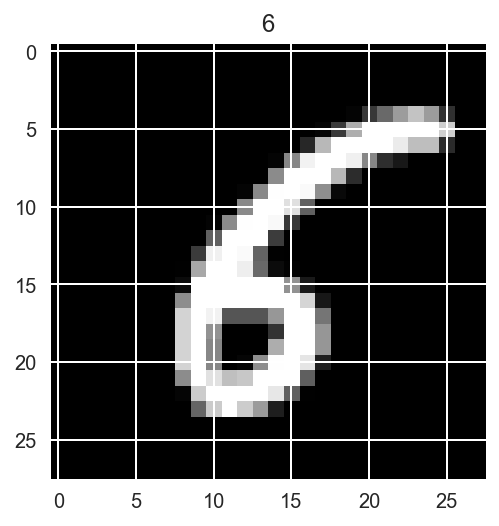

In [176]:
PREVIEW_INDEX = 3
img = train_images.iloc[PREVIEW_INDEX].as_matrix()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[PREVIEW_INDEX, 0])

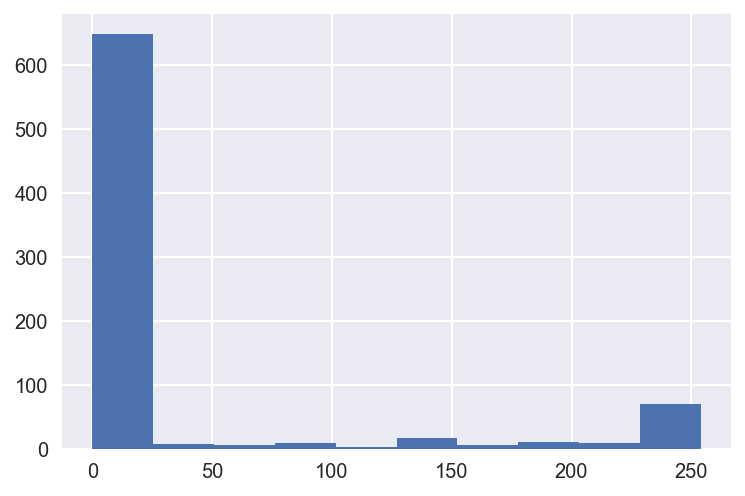

In [177]:
plt.hist(train_images.iloc[PREVIEW_INDEX])
plt.show()

In [178]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)

0.11899999999999999

/Users/hermish/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hermish/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/hermish/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

0.90100000000000002

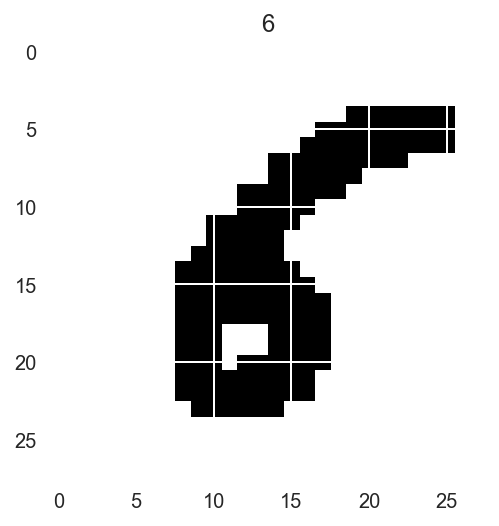

In [179]:
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1
img = train_images.iloc[i].as_matrix().reshape((28, 28))
plt.imshow(img, cmap='binary')
plt.title(train_labels.iloc[PREVIEW_INDEX, 0])

clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images, test_labels)